In [66]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import math

from sklearn import datasets
from sklearn.model_selection import train_test_split  
from sklearn import metrics

In [2]:
# Importing the data set
df = pd.read_csv("BostonHousing.csv")

This data frame contains the following columns:

    crim : per capita crime rate by town.

    zn: proportion of residential land zoned for lots over 25,000 sq.ft.

    indus: proportion of non-retail business acres per town.

    chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

    nox: nitrogen oxides concentration (parts per 10 million).

    rm: average number of rooms per dwelling.

    age: proportion of owner-occupied units built prior to 1940.

    dis: weighted mean of distances to five Boston employment centres.

    rad: index of accessibility to radial highways.

    tax: full-value property-tax rate per $10,000.

    ptratio: pupil-teacher ratio by town.

    black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

    lstat: lower status of the population (percent).

    medv: median value of owner-occupied homes in $1000s.

### Question 1: Describe the data:
1. What missing values are there?
2. What are the summary statistics of the numerical features?
3. What do the distributions of the features look like?

In [3]:
# What are the missing values?
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [4]:
# Standardize the data set (Except Chas, whose discrete values are important)
import pandas as pd
from sklearn import preprocessing
chas = df['chas']

names = df.columns
scaler = preprocessing.StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=names)

df['chas'] = chas

#### Comment: No NaN values in the dataset

In [5]:
# Summary Statistics:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,0.069170,-2.808469e-16,-4.563763e-17,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16,-5.195668e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,0.253994,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,0.000000,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,0.000000,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,0.000000,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,0.000000,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,1.000000,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


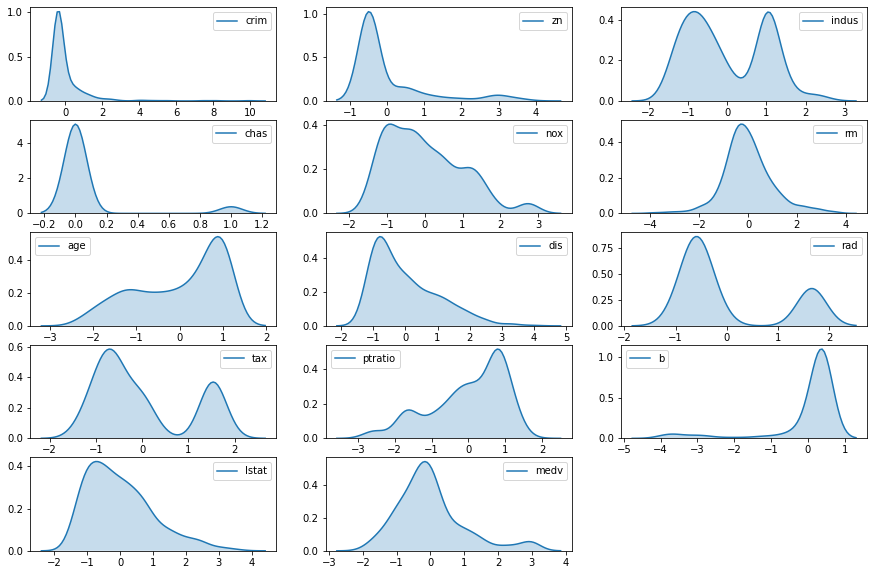

In [6]:
# Plotting the distributions of the data:
plt.figure(figsize = (15,10))

for i in np.arange(1,len(df.columns)+1):
    plt.subplot(5,3,i)
    sns.kdeplot( df.iloc[:,i-1], shade = True)
    plt.legend()



#### Removing probable "Outliers"

In [63]:
df = df[ ((df['medv'] < 2) & (df['crim']<4))] 

### 2. What features are most correlated with housing price?

Looking at a few expensive and cheap houses to get an idea of the relationship that exists. Looking at the extremes might make us vulnerable to ouliers but this is just a callibration for our heads to understand the columns and their significance

In [64]:
sorted_df = df.sort_values(by = 'medv', inplace= False)
display(sorted_df.head(10))
display(sorted_df.tail(10))


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,safety,cost,infra
400,2.494178,-0.487722,1.015999,0,1.194724,-0.424027,1.117494,-1.048780,1.661245,1.530926,0.806576,0.441052,1.978824,-1.842924,2.727078,-0.883305,1.380798
399,0.733504,-0.487722,1.015999,0,1.194724,-0.616356,0.328050,-1.090802,1.661245,1.530926,0.806576,-0.202994,2.427381,-1.766738,2.647432,-1.075634,1.380798
489,-0.399178,-0.487722,2.422565,0,0.469104,-1.240357,1.057042,-0.969583,-0.637962,1.798194,0.760340,-0.138414,1.586338,-1.690551,1.466584,-1.779815,0.860849
401,1.236195,-0.487722,1.015999,0,1.194724,0.083151,1.117494,-1.055768,1.661245,1.530926,0.806576,0.441052,1.074704,-1.668784,1.445562,-0.376127,1.380798
385,1.535926,-0.487722,1.015999,0,1.255192,-1.435535,1.049929,-1.126122,1.661245,1.530926,0.806576,0.441052,2.545127,-1.668784,3.005904,-1.894813,1.380798
415,1.684046,-0.487722,1.015999,0,1.073787,0.212795,1.117494,-0.931886,1.661245,1.530926,0.806576,-3.611923,2.298421,-1.668784,2.803634,-0.246483,1.380798
387,2.209180,-0.487722,1.015999,0,1.255192,-1.830166,0.744108,-1.082246,1.661245,1.530926,0.806576,0.441052,2.710532,-1.647016,3.373286,-2.289443,1.380798
416,0.840293,-0.487722,1.015999,0,1.073787,0.708576,0.790337,-0.939112,1.661245,1.530926,0.806576,-3.674201,1.841454,-1.636133,2.093542,0.249298,1.380798
490,-0.396375,-0.487722,2.422565,0,0.469104,-1.697672,1.046373,-0.937638,-0.637962,1.798194,0.760340,-0.419321,2.386730,-1.570830,2.267818,-2.237131,0.860849
403,2.465737,-0.487722,1.015999,0,1.194724,-1.332960,0.975252,-0.994588,1.661245,1.530926,0.806576,0.441052,0.997608,-1.549063,1.737329,-1.792238,1.380798


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,safety,cost,infra
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503,-1.150246,1.560411,-0.003643
192,-0.410435,1.443658,-1.123032,0,-1.016689,1.272741,-1.503320,1.276251,-0.523001,-0.060801,-1.505237,0.370770,-1.371329,1.509270,-1.494459,1.290981,-2.061408
264,-0.356504,0.370669,-1.045700,0,0.797361,1.312632,0.818786,-0.886536,-0.523001,-0.856665,-2.522434,0.342263,-0.638220,1.520154,-0.745171,1.569631,-3.383765
190,-0.409965,1.443658,-1.123032,0,-1.016689,0.949344,-1.674010,1.276251,-0.523001,-0.060801,-1.505237,0.230317,-1.058741,1.574573,-1.181731,0.967584,-2.061408
179,-0.413791,-0.487722,-1.266023,0,-0.576134,0.990659,-0.361825,-0.459227,-0.752922,-1.278354,-0.303094,0.441052,-1.067152,1.596340,-1.191289,1.374165,-0.544607
291,-0.411340,2.945843,-0.902709,0,-1.241285,1.230001,-1.453535,0.628275,-0.637962,-0.969512,0.344213,0.441052,-1.274609,1.607224,-1.398011,1.520855,0.319885
226,-0.376047,-0.487722,-0.720322,0,-0.437921,2.500797,0.637427,-0.275402,-0.178120,-0.601276,-0.488039,0.336671,-1.334884,1.639875,-1.447698,2.681180,-0.670075
182,-0.409924,-0.487722,-1.266023,0,-0.576134,1.239974,0.840122,-0.520264,-0.752922,-1.278354,-0.303094,0.410571,-1.097990,1.672527,-1.220967,1.623480,-0.544607
97,-0.406456,-0.487722,-1.203282,0,-0.947582,2.542112,0.264041,-0.142536,-0.867883,-0.785394,-0.210622,0.441052,-1.183496,1.759597,-1.305433,2.777730,-0.447385
180,-0.412851,-0.487722,-1.266023,0,-0.576134,2.109016,0.523633,-0.501059,-0.752922,-1.278354,-0.303094,0.426360,-0.713914,1.879318,-0.837769,2.492522,-0.544607


Crime and lstat seem to be an important factors. lstat is another one that stands out in the data set. Only expensive properties neighbor the Charles River; Could be an interesting feature as it is. 

Most columns could be considered proxies for the following sectors:
1. Safety: Crime per capita, lstat
2. Infrastructure: zn, rm, age, dis, rad, pratio
3. cost of the house: rm, (tax?: Expensive houses might have lower taxes)
4. industry: indus, nox

In [9]:
# Correlation matrix between the columns:

corr = df.corr()
display(corr)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.253435,0.515792,-0.068347,0.539857,-0.267236,0.433000,-0.471635,0.793301,0.737453,0.348703,-0.450318,0.570437,-0.542852
zn,-0.253435,1.000000,-0.526009,-0.057318,-0.510137,0.308741,-0.563518,0.683921,-0.299761,-0.293271,-0.368792,0.172417,-0.423546,0.418368
indus,0.515792,-0.526009,1.000000,0.044693,0.765550,-0.385516,0.634265,-0.716409,0.586428,0.707990,0.365107,-0.356753,0.628381,-0.614565
chas,-0.068347,-0.057318,0.044693,1.000000,0.097488,0.048543,0.080244,-0.089383,-0.027121,-0.060638,-0.116821,0.039603,0.001404,0.079605
nox,0.539857,-0.510137,0.765550,0.097488,1.000000,-0.315160,0.722528,-0.765361,0.605607,0.662827,0.178539,-0.384432,0.608538,-0.560889
rm,-0.267236,0.308741,-0.385516,0.048543,-0.315160,1.000000,-0.254131,0.252337,-0.165708,-0.242493,-0.225648,0.083179,-0.579225,0.601762
age,0.433000,-0.563518,0.634265,0.080244,0.722528,-0.254131,1.000000,-0.739156,0.441292,0.491788,0.267347,-0.268783,0.644164,-0.525729
dis,-0.471635,0.683921,-0.716409,-0.089383,-0.765361,0.252337,-0.739156,1.000000,-0.484181,-0.528555,-0.254610,0.294091,-0.544015,0.405892
rad,0.793301,-0.299761,0.586428,-0.027121,0.605607,-0.165708,0.441292,-0.484181,1.000000,0.907165,0.445908,-0.442543,0.492864,-0.487962
tax,0.737453,-0.293271,0.707990,-0.060638,0.662827,-0.242493,0.491788,-0.528555,0.907165,1.000000,0.433274,-0.440101,0.547426,-0.581251


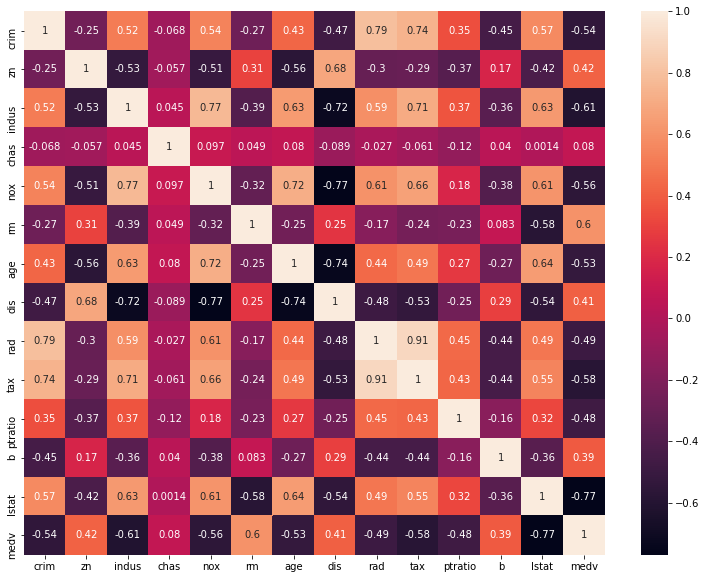

In [10]:
plt.figure(figsize = (13,10))
ax = sns.heatmap(corr, annot=True)

In [101]:
# Sorting the absolute values of the correlations:

corr['medv'].abs().sort_values(ascending= False)

medv       1.000000
lstat      0.769090
indus      0.614565
rm         0.601762
tax        0.581251
nox        0.560889
crim       0.542852
age        0.525729
rad        0.487962
ptratio    0.476324
zn         0.418368
dis        0.405892
b          0.390479
chas       0.079605
Name: medv, dtype: float64

#### Highly correlated with Housing Prices (medv):
1. Lstat (Negative Correlation): lower status of the population (percent)
   Intuative since housing prices would decrease in the neighborhoods with lower status
   
2. rm: average number of rooms per dwelling
    Bigger houses = Expensive Houses

3. Ptratio: pupil-teacher ratio by town:
   Might just be a proxy for better schools

### Generate a new feature based on the existing dataset that you think would help explain housing prices and plot its relationship with housing price

Candidates for new features: stat and crim might represent similar information and can be combined together in some    feature. They have a positive correlation of 0.46, which might say something. zn has  high negeative correlation with indus, nox and age, and can probably be used as    proxy for these three features: Lstat has a high correlation amomg these factors so doesn't have to be included

Looking at the expensive and cheap houses: Crime and lstat seem to be an important factors. lstat is another one that stands out in the data set. Only expensive properties neighbor the Charles River; Could be an interesting feature as it is. 

Most columns could be considered proxies for the following sectors:
1. Safety: Crime per capita, lstat
2. Infrastructure: zn, rm, age, dis, rad, pratio
3. cost of the house: rm, (tax?: Expensive houses might have lower taxes)
4. industry: indus, nox (Doesn't seem to have a lot effect on the model)

In [126]:
# New features; because of standarization; 
df['safety'] = 0.3*df['crim'] + df['lstat'] # Because lstat has a higher correlation. 0.3 is arbitraty and adjusted by various iterations (significance, but not too much weight)
df['cost'] = df['rm'] - 0.3*df['tax'] # Both seem to represnt the same thing (Tax has the opposide effect)
df['infra'] = 1.3*df['ptratio'] + 0.5*df['rad'] - 2*df['chas'] #Lower the better
# The weights I put in were manually adjusted. I'm sure there is a more elegant way of doing this. 

In [127]:
# Inserting the relavant features into the model:
# Inserting Safety and Infra has the most impact on the model in a positive way
X = df[['safety','rm','infra']]
y = df['medv']

### With scikit-learn, develop a model with the training data and make predictions on the test data. Plot your predictions.

In [128]:
# split into test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [129]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(X_train, y_train)

In [130]:
y_pred = regressor.predict(X_test)

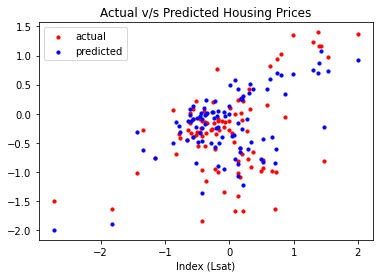

In [131]:
viz_train = plt
viz_train.scatter(X_test['rm'], y_test, color='red', s = 10, label = 'actual')
viz_train.scatter(X_test['rm'], regressor.predict(X_test), color='blue', s = 10, label = 'predicted')
viz_train.title('Actual v/s Predicted Housing Prices')
viz_train.xlabel('Index (Lsat)')
viz_train.legend()
viz_train.show()

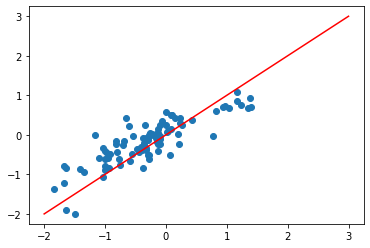

In [132]:
plt.scatter(y_test, y_pred)
x = np.linspace(-2, 3, 10)
plt.plot(x, x, linestyle='solid', color='red')

In [133]:
# RMSE is probably a good judge since our objective is reducing the error:

sklearn.metrics.r2_score(y_test, y_pred)

mse = math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)) 
print('Root mean square error', mse) 

Root mean square error 0.40141858876760994
